# Quick Success

In [ ]:
! pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! cp -r /content/drive/MyDrive/IW_4Parking/* .

cp: cannot stat '/content/drive/MyDrive/IW_4Parking/*': No such file or directory


In [ ]:
# import dependencies
%load_ext autoreload
%autoreload 2

import io
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import Image as JImage
from colab_webcam import (js_to_image,
                          bbox_to_bytes,
                          take_photo,
                          video_stream,
                          video_frame)
from utils import visualize_results, bboxes2csv
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def show_image(img):
  plt.figure(figsize=(15, 12))
  plt.axis(False)
  plt.imshow(img)

# Task 1. Upload a photo of your parking space
You can do it in two ways:

1. Download [DroidCam](https://www.dev47apps.com/) app to use your smartphone as a web camera. (We highly encourage you to choose this option).
2. Take a picture on your smartphone and upload it to the GoogleColab.

Assign the variable `imagename` with the name of your picture.

In [ ]:
# DroidCam Scenario
imagename = take_photo('photo.jpg')
print('Saved to {}'.format(imagename))

# Show the image which was just taken.
display(JImage(imagename))

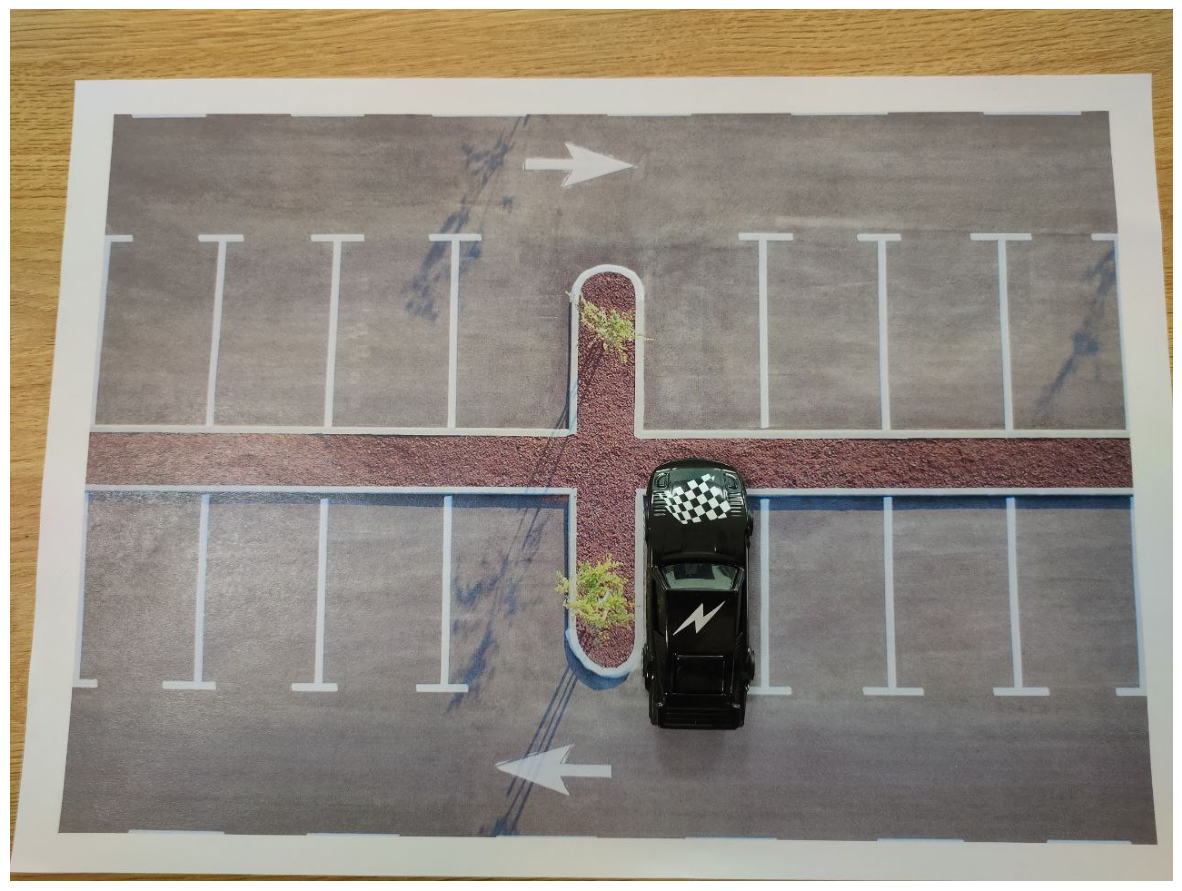

In [ ]:
imagename = 'picture1.jpg'
img = plt.imread('picture1.jpg')
show_image(img)

## Task 2. Make a grid of parking spots

To establish your parking monitoring system, the first thing you should to do is to properly label all parking places on the obtained photo. You purpose is to obtain `.csv` file, similar to `spots.csv` file, that can be find in archive. In this file only four places alre labeled, but you should label all of them.
We propose you a few options for doing so:

1. **Feel spots.csv file manually**. You can put the proper positions of each parking spot in the `spots.csv`.
2. **Use online labeling tool**. For instance you can investigate [MakeSense](https://www.makesense.ai/).
To check, that you labels are correct, you can run the code in the cell below.

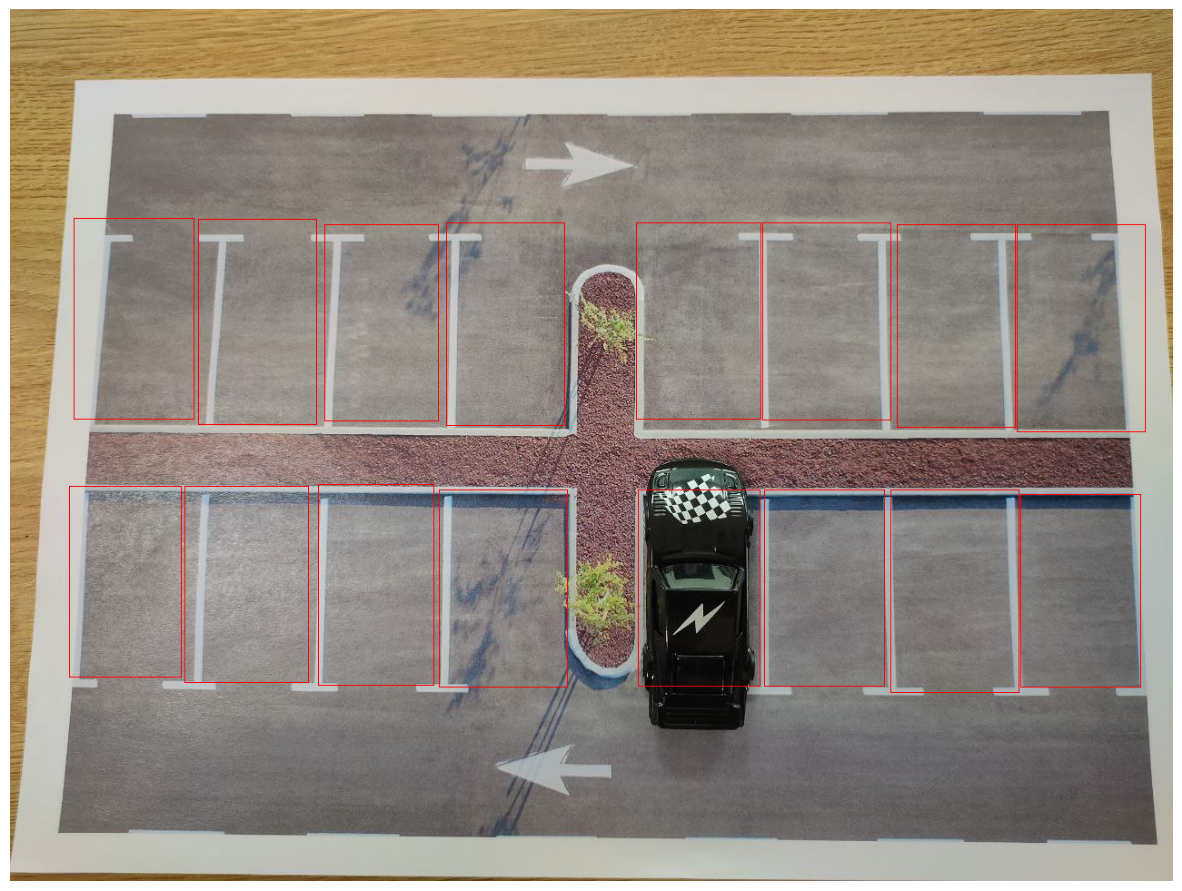

In [ ]:
filename = 'labels.csv'
visualize_results(img, filename)

# Task 3. Detect cars on the picture with YOLO model.

To understand, how many parking spots are currently occupied, you should detect all objects which are located on the parking. One of the way to do this is to use object detection model from the YOLO family. We encourage you to use YOLOv8 as the latest release of this model, but you are free to experiment with other. In the cell below you can find a code snippet for obtaining model and use it for detecting objects.

In [ ]:
from ultralytics import YOLO

model_name = 'yolov8x.pt' # "PUT NAME OF YOLO MODEL HERE" # Here you can try yolov8n.pt, yolov8m.pt, yolov8l.pt or yolov8x.pt
model = YOLO(model_name)
results = model('picture10.jpg') # The name of picture of parking space


image 1/1 /content/picture10.jpg: 480x640 1 train, 1 dog, 1 teddy bear, 3293.6ms
Speed: 3.0ms preprocess, 3293.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


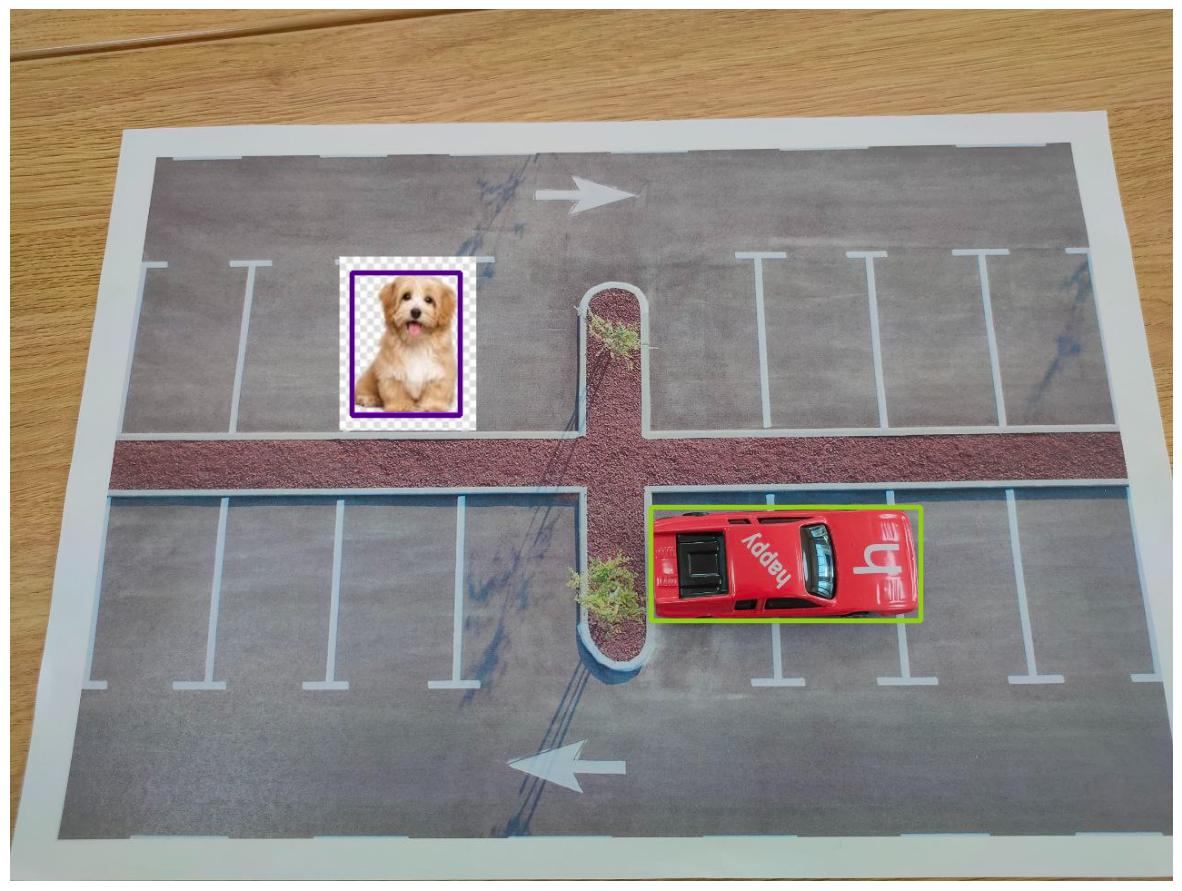

In [ ]:
for r in results:
    im_array = r.plot(labels=False, conf=False)  # plot a BGR numpy array of predictions
    show_image(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))

You can obtain bounding boxes for each object which has been detected with help of the following code.

In [ ]:
for r in results:
  print(r.boxes.data.numpy())

[[     376.24      290.36      495.29      447.02      0.7433          16]
 [     705.19      548.26      1002.3      673.72     0.26908           6]
 [     376.36      290.35      495.07      446.79     0.26107          77]]


In [ ]:
classes = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

'bicycle'

In [ ]:
FINAL_OBJECTS = []
NUMBER_OF_OJECTS = len(results[0])
for r in results:
  for i in range(NUMBER_OF_OJECTS):
    FINAL_OBJECTS.append(list(r.boxes.data.numpy()[i]))

print(FINAL_OBJECTS)
print(NUMBER_OF_OJECTS)

[[376.2377, 290.36096, 495.29398, 447.0194, 0.74330366, 16.0], [705.1891, 548.25574, 1002.2543, 673.7157, 0.2690755, 6.0], [376.36194, 290.35345, 495.0725, 446.78595, 0.26106703, 77.0]]
3


As you can see, we have an array of six numbers for each detected object and the first four of them are coordinates of bounding box.

You can use function `bboxes2csv` to create the file `objects.csv` with coordinates of bounding boxes of detected objects.

In [ ]:
for r in results:
  bboxes2csv(r.boxes.data.numpy())

# Task 4. Find intersections of objects and parking spots

In this task you will finally calculate the number of available parking slots. For this moment you have already had the coordinates of parking spots and objects in this area. Now for each parking spot you should understand, does it overlap with any object. We prepare for you code snippets, that you should feel.

In [ ]:
import pandas as pd


In [ ]:
labels = pd.read_csv("labels.csv")
FINAL_COORDS_SPOTS = []

list(labels.loc[0])
NUMBER_OF_SPOTS = len(labels)
for i in range(NUMBER_OF_SPOTS):
  FINAL_COORDS_SPOTS.append(list(labels.loc[i]))
print(FINAL_COORDS_SPOTS)

[[70, 230, 202, 451], [65, 525, 188, 735], [207, 231, 337, 457], [192, 525, 328, 741], [346, 237, 471, 453], [339, 523, 466, 744], [480, 235, 610, 458], [472, 529, 613, 746], [691, 529, 825, 745], [689, 235, 826, 451], [828, 235, 969, 452], [830, 529, 962, 745], [969, 529, 1110, 752], [976, 237, 1106, 460], [1108, 237, 1249, 465], [1112, 534, 1244, 746]]


In [ ]:
def ratio_overlap_parking_area(p, d):
    '''
    Calculate the ratio of area of parking spot,
    which is overlapped by detected object

    p: (xp1, yp1, xp2, yp2) - tuple of left upper coordinate and
    bottom right coordinate of parking spot
    d: (xd1, yd1, xd2, yd2) - tuple of left upper coordinate and
    bottom right coordinate of detected object

    return ratio of the intersection area to the area of the whole parking spot
    '''
    # YOUR CODE HERE

    xp1, yp1, xp2, yp2 = p[0], p[1], p[2], p[3]
    xd1, yd1, xd2, yd2 = d[0], d[1], d[2], d[3]
    area1 = (xp2 - xp1) * (yp2 - yp1)
    right_inside = xp2 - xd2 >= 0
    left_inside = xd1 - xp1 >= 0
    up_inside = yd1 - yp1 >= 0
    down_inside = yp2 - yd2 >= 0

    x_overlap1 = max(xp1, xd1)
    y_overlap1 = max(yp1, yd1)
    x_overlap2 = min(xp2, xd2)
    y_overlap2 = min(yp2, yd2)

    if x_overlap2 > x_overlap1 and y_overlap2 > y_overlap1:
        area_overlap = (x_overlap2 - x_overlap1) * (y_overlap2 - y_overlap1)
    else:
        area_overlap = 0

    ratio = (area_overlap / area1)
    # real_width = xd2 - xd1
    # real_height = yd2 - yd1

    # if not right_inside and not left_inside:
    #   real_width = xp2 - xp1
    # if not up_inside and not down_inside:
    #   real_height = yp2 - yp1



    # square_parking_spot = (p[2] - p[0]) * (p[3] - p[1])
    # square_detected_object = (d[2] - d[0]) * (d[3] - d[1])
    # ratio = square_detected_object /square_parking_spot
    return ratio

In [ ]:
for i in range(NUMBER_OF_SPOTS):
  sample_obj = tuple(FINAL_OBJECTS[0][:4])
  sample_spot = tuple(FINAL_COORDS_SPOTS[i])
  print(ratio_overlap_parking_area(sample_spot, sample_obj))


0.0
0.0
0.0
0.0
0.5498264650180936
0.0
0.08264679220621032
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
classes

In [ ]:
# use ratio_overlap_parking_area to process each parking spot
def count_available_spots(spots, objects, t=0.25):

    '''
    Detect available parking spots
    spots - spots.csv file with coordinates of parking spots
    objects - objects.csv file with coordinates of detected objects
    t - threshold to judge, does parking space occupied
    return num_available_spots
    '''

    num_available_spots = len(spots)
    available_classes = [1, 2, 3, 5, 7, 67]
    taken_spots = []
    ratios = []
    other_garbage = []
    # YOUR CODE HERE
    number_of_obj = len(objects)
    for i in range(number_of_obj):
      obj_coord = tuple(objects[i][:4])
      cls = objects[i][-1]
      for j in range(len(spots)):
        coord_spot = spots[j]
        ratio = ratio_overlap_parking_area(coord_spot, obj_coord)

        if ratio > t and cls in available_classes and j+1 not in taken_spots:
          print(f"{ratio} for the {j+1} spot of the class: {classes[int(cls)]}")
          taken_spots.append(j+1)
          ratios.append(ratio)
          num_available_spots -= 1
        if ratio > t and j+1 not in taken_spots:
          print(f"Unknown object with the ratio {ratio} for the {j+1} spot of the class: {classes[int(cls)]}. Maybe garbage")
        if ratio > t and cls in available_classes and j+1 in taken_spots:
          print(f"There is a parking violation in the spot {j+1} of the object: {classes[int(cls)]}")
    print(f"Number of available spots: {num_available_spots}")
    return [num_available_spots, taken_spots, ratios]

In [ ]:
num_available_spots = count_available_spots(FINAL_COORDS_SPOTS, FINAL_OBJECTS)
print(num_available_spots)

Unknown object with the ratio 0.5498264650180936 for the 5 spot of the class: dog. Maybe garbage
Unknown object with the ratio 0.5193294802255364 for the 9 spot of the class: train. Maybe garbage
Unknown object with the ratio 0.5808331524884259 for the 12 spot of the class: train. Maybe garbage
Unknown object with the ratio 0.5483136332283417 for the 5 spot of the class: teddy bear. Maybe garbage
Number of available spots: 16
[16, [], []]


In [ ]:
FINAL_COORDS_SPOTS

[[70, 230, 202, 451],
 [65, 525, 188, 735],
 [207, 231, 337, 457],
 [192, 525, 328, 741],
 [346, 237, 471, 453],
 [339, 523, 466, 744],
 [480, 235, 610, 458],
 [472, 529, 613, 746],
 [691, 529, 825, 745],
 [689, 235, 826, 451],
 [828, 235, 969, 452],
 [830, 529, 962, 745],
 [969, 529, 1110, 752],
 [976, 237, 1106, 460],
 [1108, 237, 1249, 465],
 [1112, 534, 1244, 746]]

# Congratulations!!!
Now you have a prototype of monitoring system, but could you do it better? You can proceed with additional task, which make your system much more closer to the real world scenario.

In [ ]:
print(num_available_spots)

[11, [6, 9, 3, 7, 11], [0.994317002183809, 0.86810302734375, 0.7557917786492675, 0.7468450033032342, 0.965547169353945]]


In [ ]:
def visualize_occupancy(taken_spots, spots_coords, img_path, ratios):
  img = plt.imread(img_path)
  for i in range(len(taken_spots)):
    xy = spots_coords[taken_spots[i] - 1]
    x1, y1, x2, y2 = int(xy[0]), int(xy[1]), int(xy[2]), int(xy[3])
    print(f"The spot number {taken_spots[i]} is taken with ratio {ratios[i] * 100}%")
    show_image(img[y1:y2, x1:x2])



The spot number 6 is taken with ratio 99.4317002183809%
The spot number 9 is taken with ratio 86.810302734375%
The spot number 3 is taken with ratio 75.57917786492675%
The spot number 7 is taken with ratio 74.68450033032342%
The spot number 11 is taken with ratio 96.55471693539451%


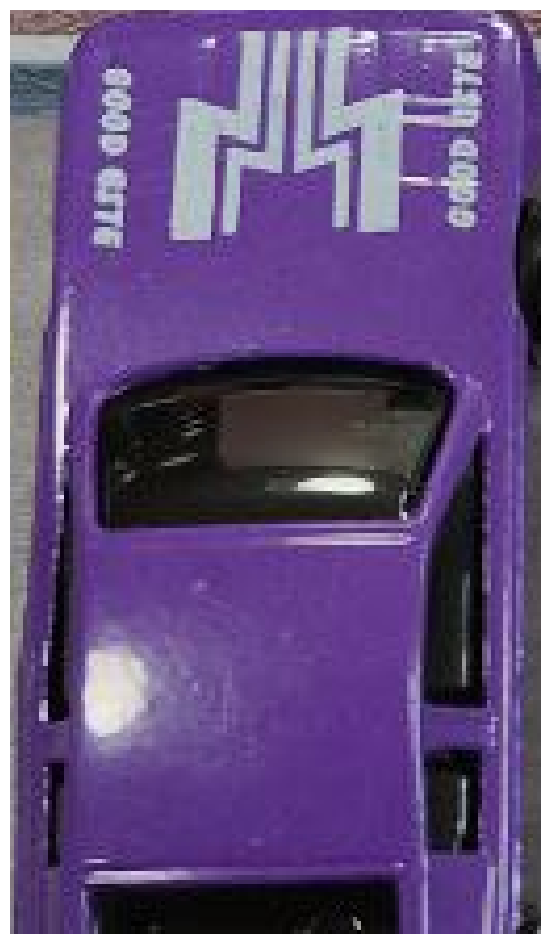

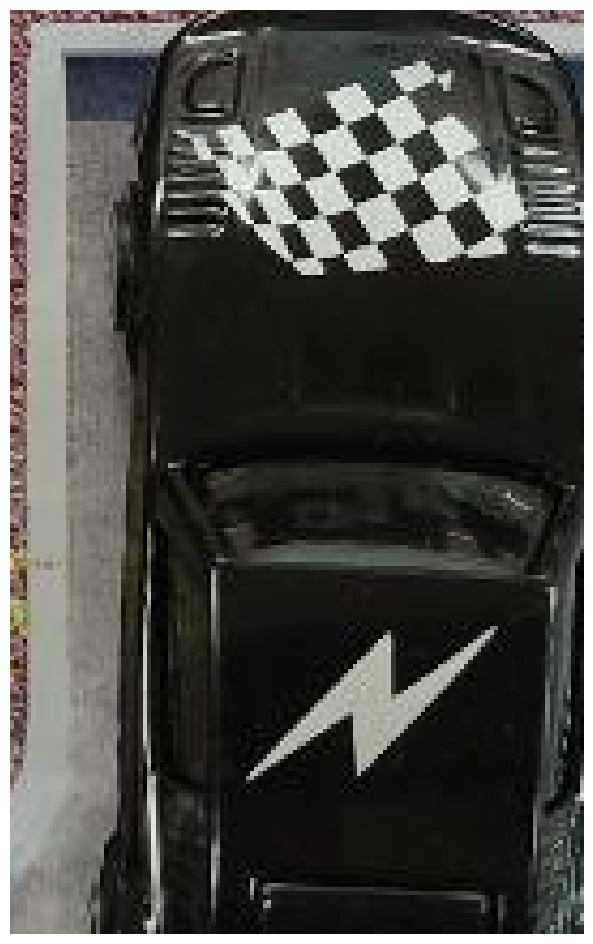

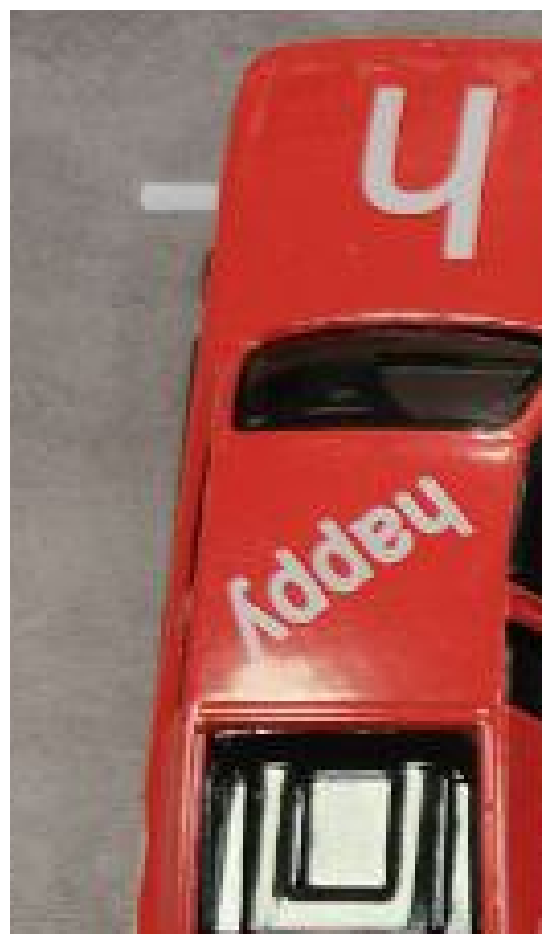

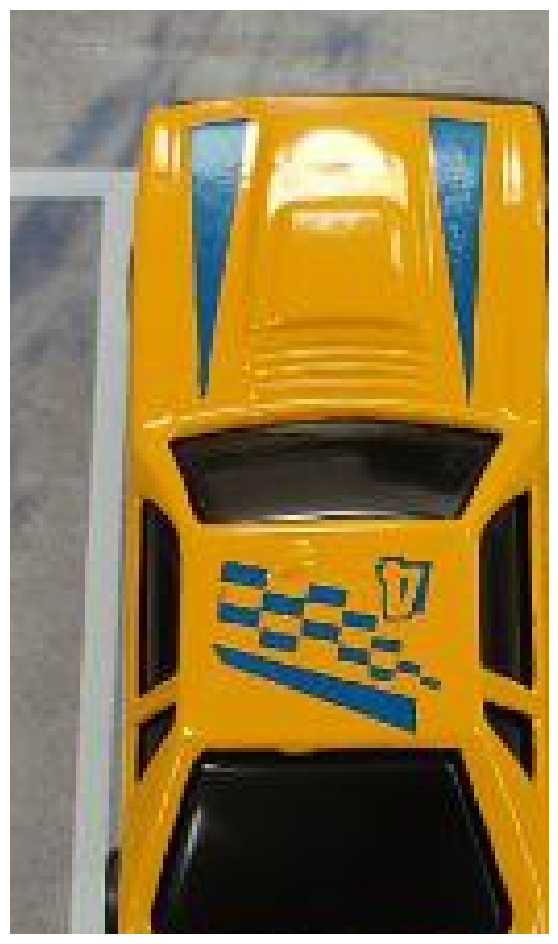

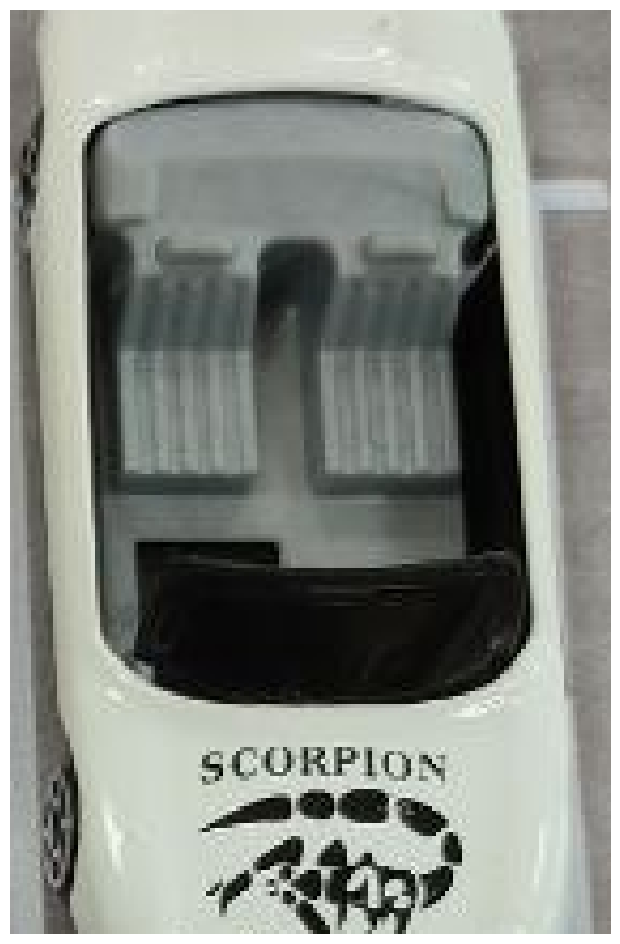

In [ ]:
tkn_spots = num_available_spots[1]
ratios = num_available_spots[2]
path = "picture4.jpg"
visualize_occupancy(tkn_spots, FINAL_COORDS_SPOTS, path, ratios)

COLOR DETECTION


In [ ]:
import cv2

In [ ]:
FINAL_OBJECTS

[[339.72174, 518.7562, 469.7627, 824.0353, 0.9086569, 67.0],
 [708.6742, 524.4674, 839.5343, 823.49365, 0.51588213, 5.0],
 [707.8843, 525.6561, 839.99316, 823.40906, 0.46992624, 67.0],
 [236.59583, 235.84224, 369.52338, 490.25946, 0.40242836, 5.0],
 [503.90588, 253.92613, 614.0242, 497.77222, 0.39583322, 67.0],
 [824.14764, 217.51376, 964.14215, 478.15042, 0.28694308, 67.0],
 [608.97754, 601.7501, 698.19434, 746.93225, 0.28685978, 58.0],
 [828.91943, 217.53941, 963.6697, 478.20605, 0.26628813, 5.0]]

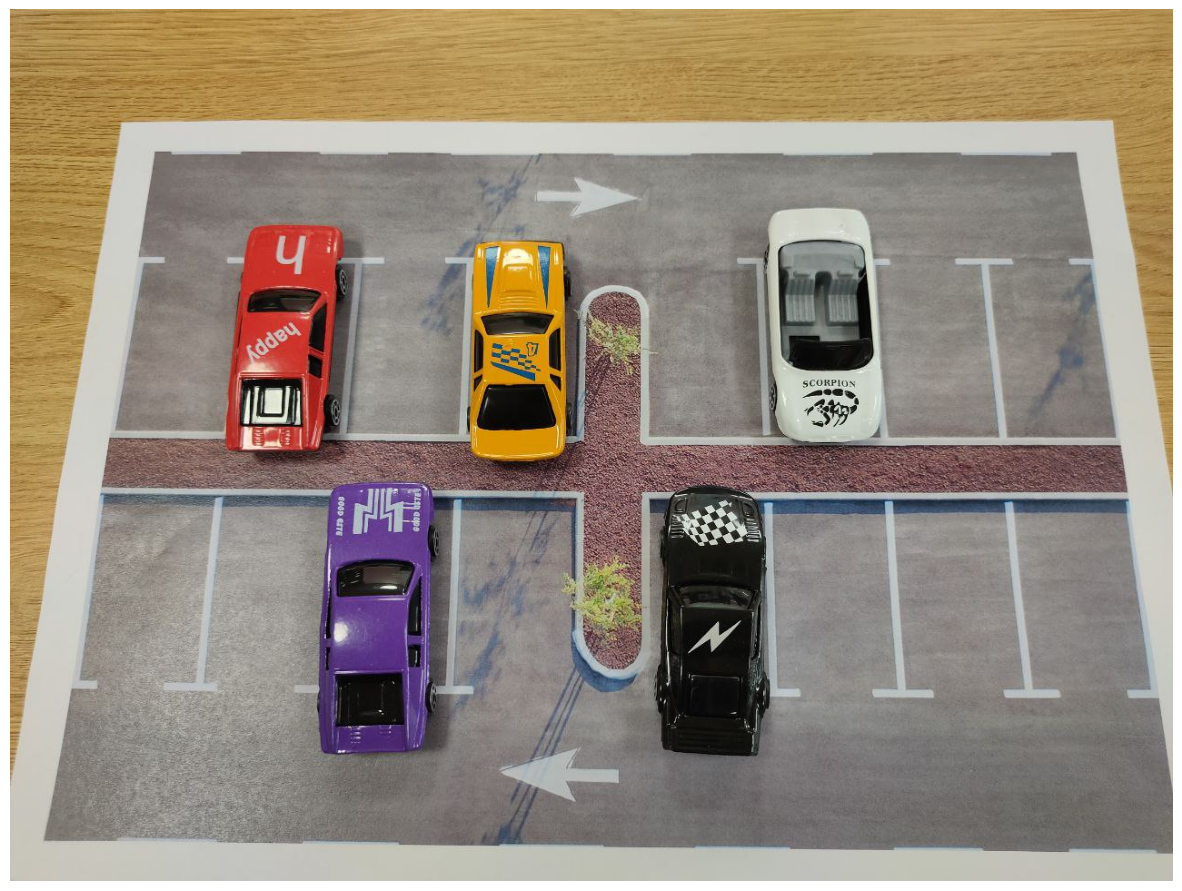

In [ ]:
first_img = plt.imread('picture4.jpg')
show_image(first_img)

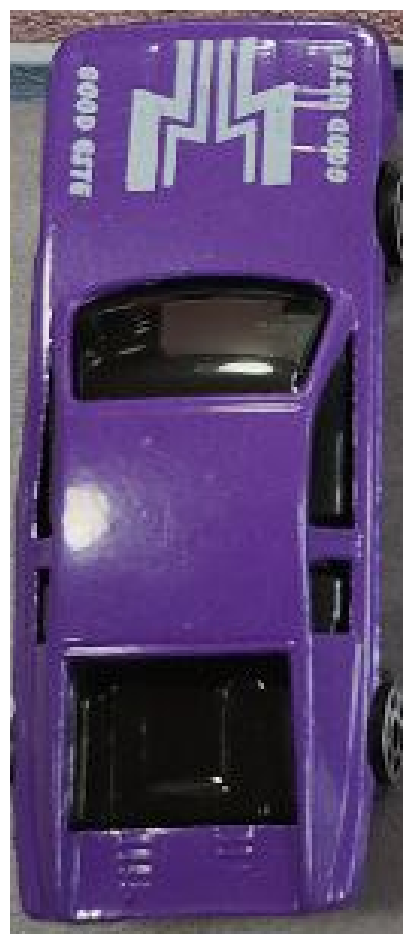

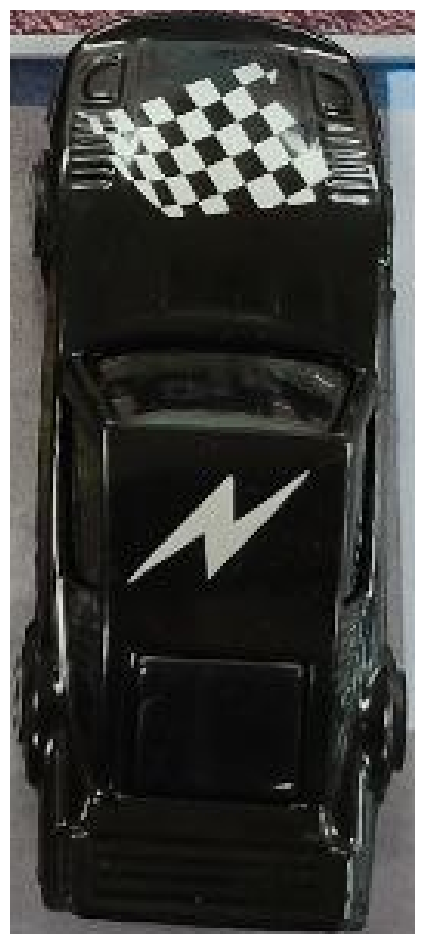

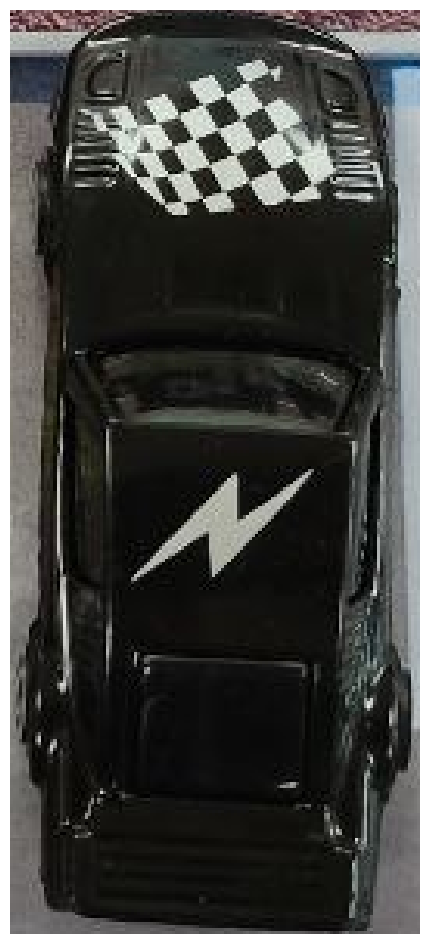

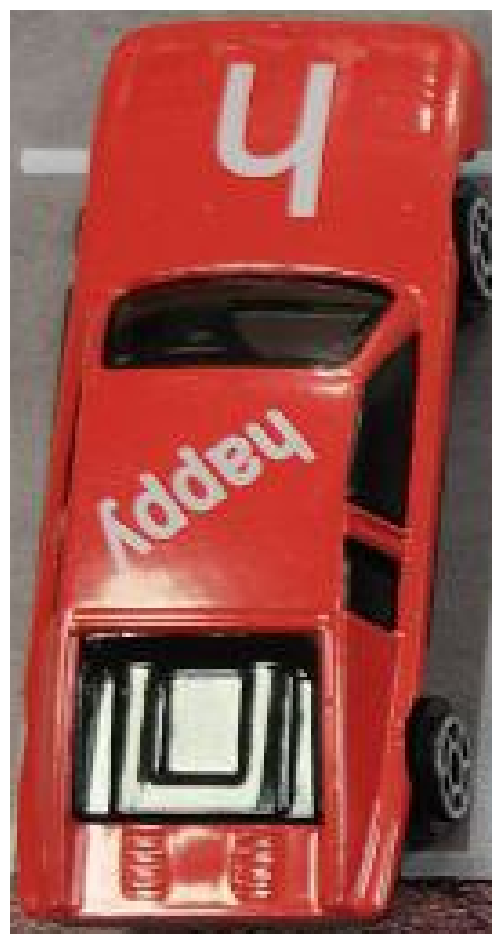

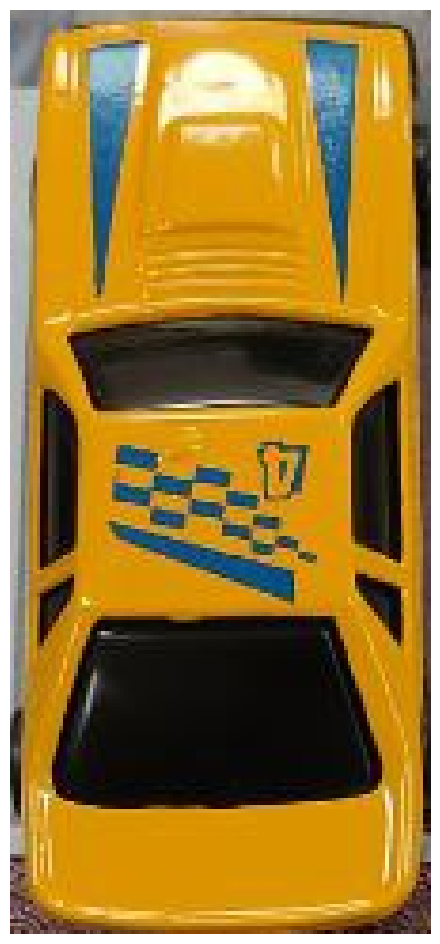

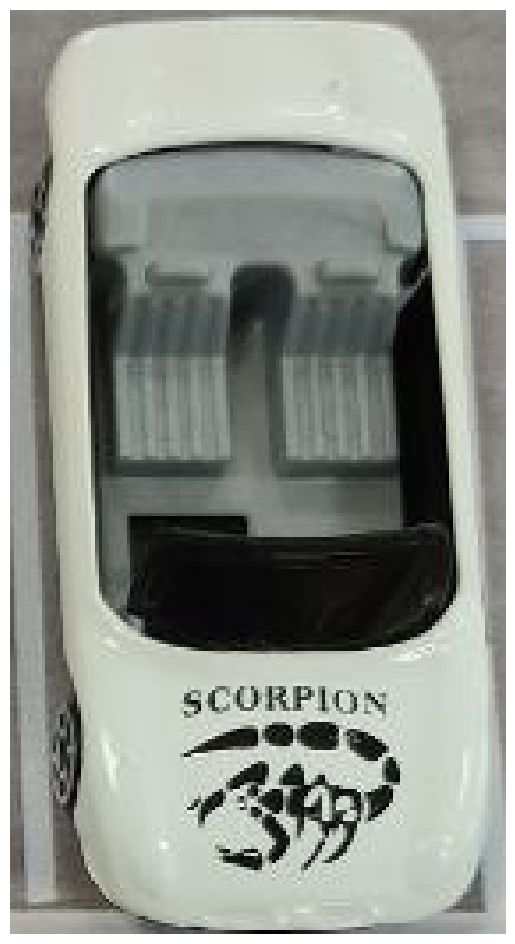

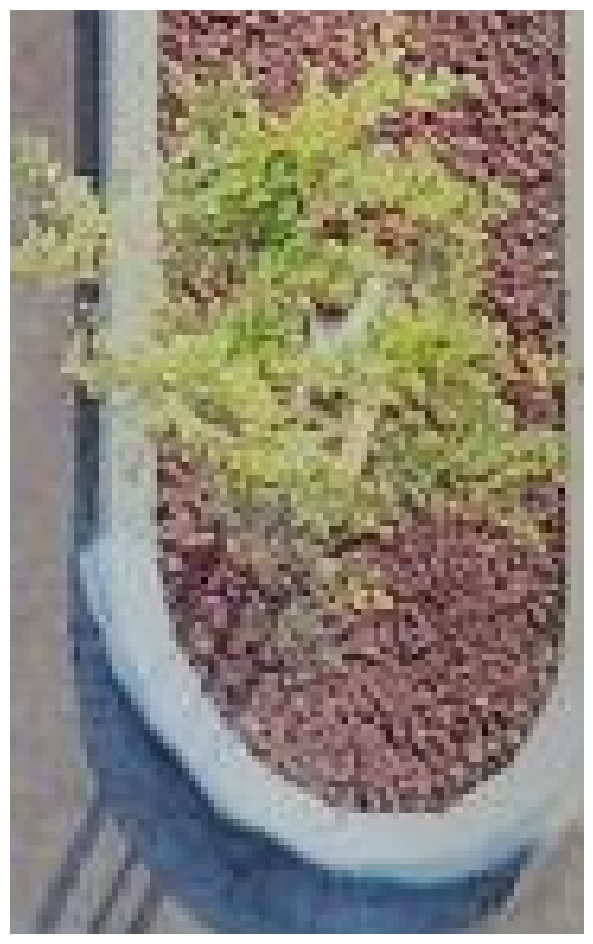

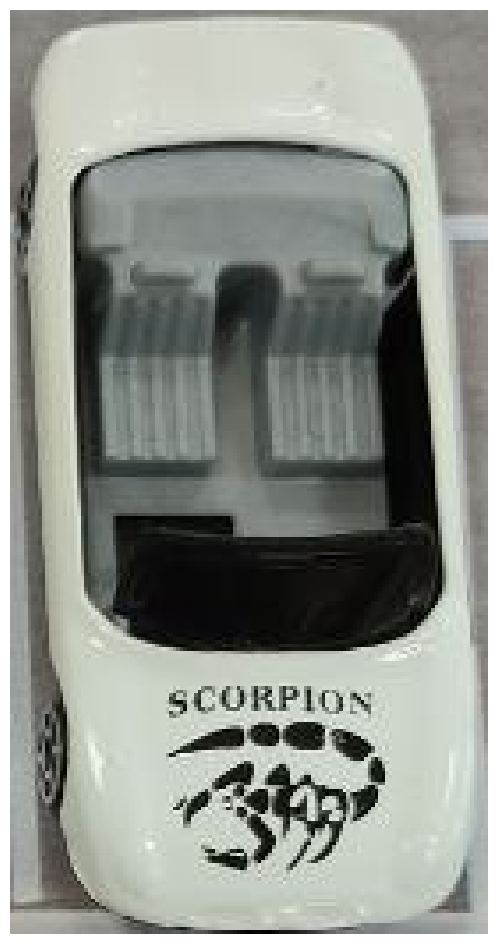

In [ ]:
for i in range(len(FINAL_OBJECTS)):
  xy = FINAL_OBJECTS[i][:4]
  x1, y1, x2, y2 = int(xy[0]), int(xy[1]), int(xy[2]), int(xy[3])
  show_image(first_img[y1:y2, x1:x2])
  plt.savefig("img" + str(i+1) + ".png")


In [ ]:
classes


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [ ]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
train_dir = "train_set"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=42)

Found 33 images belonging to 6 classes.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/" + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (1280, 960, 3)


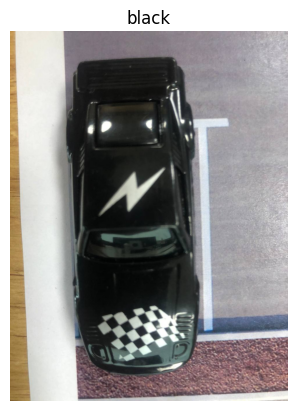

In [ ]:
img = view_random_image(target_dir="train_set",
                        target_class="black")

In [ ]:
history = model1.fit(train_data,
                    steps_per_epoch=32,
                    epochs=5,
                    )

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_steps)
print(f'Test accuracy: {test_acc}')


# Bonus Task

# Video processing

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored